# 📊**FlipItNews: Natural Language Processing Business Case**

## 📝 **Metadata**

**Notebook Title:** FlipItNews: Natural Language Processing   
**Author:** Vishnu Vineeth P M

**Date Created:** May 2025   
**Tools Used:** Python, Pandas, Statsmodels, Scikit-learn, TensorFlow  
**Objective:** Our task is to analyze the dataset of news articles to
 categorize them into their respective categories like politics, technology, sports, business, and entertainment. Your primary goal is to use natural language processing to create and compare at least three different models for this multi-class classification problem.

#📈 Introduction

FlipItNews is transforming the Indian finance, business, and investment
 landscape using AI and ML.

 ● This case focuses on harnessing natural language processing to categorize
 news articles, a critical component for delivering relevant content to users.

 ● Byanalyzing its internal database of news articles, FlipItNews aims to
 intelligently categorize content into domains like politics, technology, sports, business, and entertainment.

 ●Theinsights from this analysis can significantly improve content discover and user engagement, driving financial literacy and investment awareness among
 millennials and first-time investors.

### 💼Importing libraries

In [1]:
#Data loading and processing
import pandas as pd
import numpy as np

# Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Text Preprocessing
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Data encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Data Modeling
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.layers import Dense, Embedding, SimpleRNN, LSTM, Dropout, SpatialDropout1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [3]:
# Enable CUDA for TensorFlow
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    try:
        for device in physical_devices:
            tf.config.experimental.set_memory_growth(device, True)
        print("CUDA is enabled. GPU is available and will be used for computations.")
    except RuntimeError as e:
        print(f"Failed to set memory growth: {e}")
else:
    print("GPU is not available. Using CPU.")

GPU is not available. Using CPU.


In [4]:
#loading the dataset
df = pd.read_csv('flipitnews-data.csv')
df.head()

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
4,Entertainment,ocean s twelve raids box office ocean s twelve...


## **📊Exploratory Data Analysis**

In [5]:
df.shape

(2225, 2)

There are 2225 rows and 2 columns in the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  2225 non-null   object
 1   Article   2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [7]:
df.Category.value_counts()

,count
Category,
Sports,511
Business,510
Politics,417
Technology,401
Entertainment,386


Most number of articles are from the category Sports and Business

In [8]:
df.describe()

,Category,Article
count,2225,2225
unique,5,2126
top,Sports,blind student hears in colour a blind studen...
freq,511,2


## Univariate Analysis

In [9]:
df1 = df.copy()

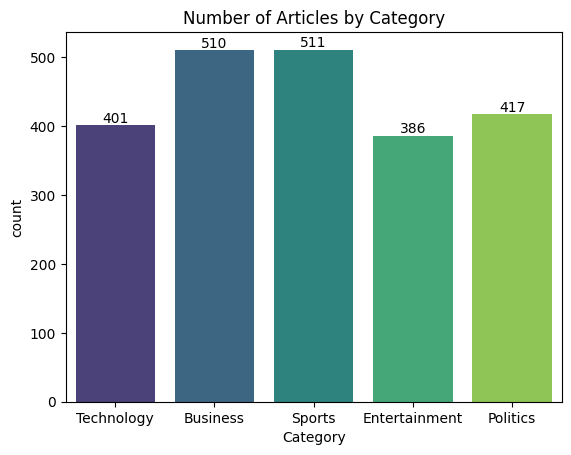

In [10]:
# Distribution of articles by category

ax = sns.countplot(data=df1, x='Category', palette='viridis')
plt.title('Number of Articles by Category')
for i in ax.containers:
  ax.bar_label(i)
plt.show()

In [11]:
#creating a new column to give the sentence length
df1["article_len"] = [len(articles) for articles in df['Article']]
df1.head()

,Category,Article,article_len
0,Technology,tv future in the hands of viewers with home th...,4333
1,Business,worldcom boss left books alone former worldc...,1842
2,Sports,tigers wary of farrell gamble leicester say ...,1342
3,Sports,yeading face newcastle in fa cup premiership s...,2176
4,Entertainment,ocean s twelve raids box office ocean s twelve...,1579


<Axes: xlabel='article_len', ylabel='Density'>

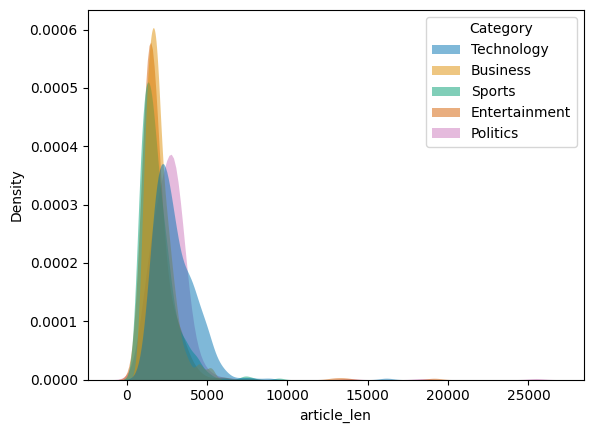

In [12]:
#kde plot on the article length
sns.kdeplot(df1,
            x="article_len",
            hue="Category",
            fill=True,
            common_norm=False,
            palette="colorblind",
            alpha=.5,
            linewidth=0)

**Insights**
- The KDE plot shows that most articles across all categories fall between 2,000 to 4,000 characters, with a strong peak in that range.
- Business articles are the most consistently short, while Technology and Entertainment articles exhibit more variation, occasionally reaching much higher lengths.
- All categories have a right-skewed distribution, and there's considerable overlap among them, indicating that article length alone isn't a reliable feature for categorizing news.

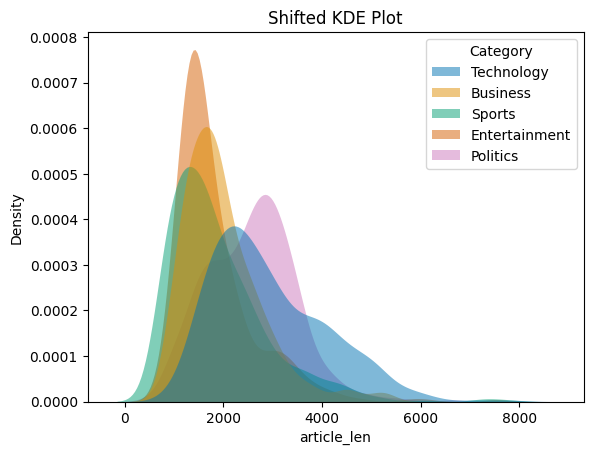

In [13]:
#let us filter out the article lenght less than 8000
df1_filtered = df1[df1['article_len'] < 8000]

#shifted kde plot
sns.kdeplot(df1_filtered,
            x="article_len",
            hue="Category",
            fill=True,
            common_norm=False,
            palette="colorblind",
            alpha=.5,
            linewidth=0)
plt.title("Shifted KDE Plot")
plt.show()

**Insights**
- Most articles are short across all categories, with Business and Sports being the most consistent in length, while Technology and Entertainment show more variability.

In [14]:
df1["Article"][10]

'berlin cheers for anti-nazi film a german movie about an anti-nazi resistance heroine has drawn loud applause at berlin film festival.  sophie scholl - the final days portrays the final days of the member of the white rose movement. scholl  21  was arrested and beheaded with her brother  hans  in 1943 for distributing leaflets condemning the  abhorrent tyranny  of adolf hitler. director marc rothemund said:  i have a feeling of responsibility to keep the legacy of the scholls going.   we must somehow keep their ideas alive   he added.  the film drew on transcripts of gestapo interrogations and scholl s trial preserved in the archive of communist east germany s secret police. their discovery was the inspiration behind the film for rothemund  who worked closely with surviving relatives  including one of scholl s sisters  to ensure historical accuracy on the film. scholl and other members of the white rose resistance group first started distributing anti-nazi leaflets in the summer of 19

**Insights**

- There are 2225 rows and two features in the dataset
- More number of articles are published on Sports and Businesses

## Data Preprocessing

In [15]:
df.isnull().sum()

,0
Category,0
Article,0


There are no missing values present in the dataset

In [16]:
#duplicate checking
df[df.duplicated()].shape

(99, 2)

There are duplicates present in the dataset

In [17]:
#removing duplicates
df = df.drop_duplicates(keep='last')

In [18]:
df.shape

(2126, 2)

We are going to do the text data preprocessing which includes the steps :

1. Remove non-letters and stopwords to reduce noise in the text.
2. Tokenize the text to convert sentences into words.
3. Perform lemmatization to bring words to their base or dictionary form.


In [19]:
df2 = df.copy()

In [20]:
#defining a function for text preprocessing

import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')


def preprocessed_text(text) :
  #remove non alphabets
  text = re.sub(r"[^a-zA-Z]"," ",text)

  #to lowercase
  text = text.lower()

  #tokenize
  tokens = word_tokenize(text)

  #remove stopwords
  stop_words = set(stopwords.words('english'))
  tokens = [word for word in tokens if word not in stop_words]

  #lemmatization
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(word) for word in tokens]

  return tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
df['Article'] = df['Article'].apply(preprocessed_text)

In [22]:
df.head()

,Category,Article
0,Technology,"[tv, future, hand, viewer, home, theatre, syst..."
1,Business,"[worldcom, bos, left, book, alone, former, wor..."
2,Sports,"[tiger, wary, farrell, gamble, leicester, say,..."
3,Sports,"[yeading, face, newcastle, fa, cup, premiershi..."
5,Politics,"[howard, hit, back, mongrel, jibe, michael, ho..."


### Feature Engineering and train test split

In [23]:
#let us encode the Category column using LabelEncoder

le = LabelEncoder()
df["Category"] = le.fit_transform(df["Category"])

df.head()

,Category,Article
0,4,"[tv, future, hand, viewer, home, theatre, syst..."
1,0,"[worldcom, bos, left, book, alone, former, wor..."
2,3,"[tiger, wary, farrell, gamble, leicester, say,..."
3,3,"[yeading, face, newcastle, fa, cup, premiershi..."
5,2,"[howard, hit, back, mongrel, jibe, michael, ho..."


In [24]:
#train test split
X = df['Article']
y = df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1700,)
Shape of X_test: (426,)
Shape of y_train: (1700,)
Shape of y_test: (426,)


In [25]:
X_train.head()

,Article
1315,"[tokyo, say, deflation, controlled, japanese, ..."
518,"[yukos, drop, bank, court, bid, russian, oil, ..."
1187,"[newcastle, join, morientes, race, newcastle, ..."
1387,"[parker, saxophone, head, auction, saxophone, ..."
924,"[india, open, sky, competition, india, allow, ..."


In [26]:
y_train.value_counts()

,count
Category,
0,409
3,407
2,316
1,305
4,263


Inorder to convert the textual data intp numerical data we can use either Bag of Words or TF-IDF.

In [27]:
#joining the tokens
art_train = X_train.apply(lambda x: " ".join(x)).to_list()
art_test = X_test.apply(lambda x: " ".join(x)).to_list()

In [28]:
print("length of art_train is :",len(art_train))
print("length of art_test is :",len(art_test))

length of art_train is : 1700
length of art_test is : 426


In [29]:
#bag or words vectorization
vectorizer = CountVectorizer()
bow_matrix_a = vectorizer.fit_transform(art_train)
bow_matrix_b = vectorizer.transform(art_test)

bow_train = pd.DataFrame(bow_matrix_a.toarray(), columns=vectorizer.get_feature_names_out())
bow_test = pd.DataFrame(bow_matrix_b.toarray(), columns=vectorizer.get_feature_names_out())

bow_train.head()

,aa,aaa,aac,aadc,aaliyah,aaltra,aamir,aan,aara,aarhus,...,zoom,zooropa,zornotza,zorro,zubair,zuluaga,zurich,zutons,zvonareva,zvyagintsev
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Naive Bayes

Accuracy: 0.98
f1 score : 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        94
           1       0.98      0.97      0.98        64
           2       0.96      0.98      0.97        87
           3       1.00      0.99      0.99        97
           4       0.98      0.99      0.98        84

    accuracy                           0.98       426
   macro avg       0.98      0.98      0.98       426
weighted avg       0.98      0.98      0.98       426



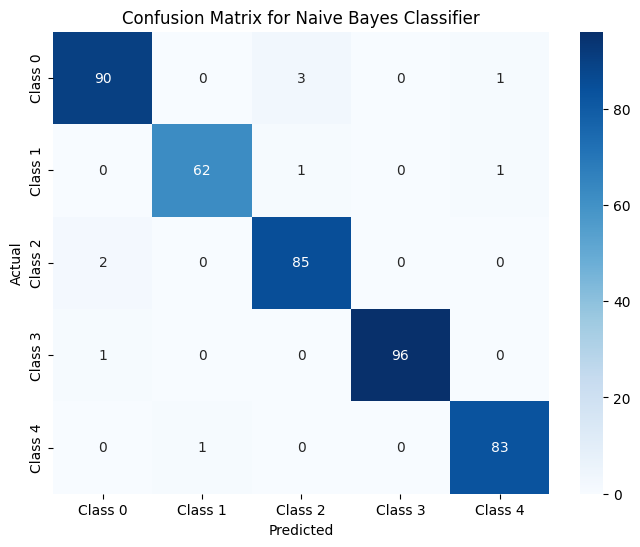

In [30]:
# Create a Multinomial Naive Bayes classifier
naive_bayes_bow = MultinomialNB()

# Train the classifier
naive_bayes_bow.fit(bow_train, y_train)

# Make predictions on the test set
y_pred_bow = naive_bayes_bow.predict(bow_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_bow)
f1 = f1_score(y_test, y_pred_bow, average='weighted')
print(f"Accuracy: {accuracy:.2f}")
print(f"f1 score : {f1:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_bow))

#plot Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_bow)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0','Class 1','Class 2','Class 3','Class 4'],
            yticklabels=['Class 0','Class 1','Class 2','Class 3','Class 4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

## Decision Trees

Accuracy: 0.84
f1 score : 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.74      0.79        94
           1       0.85      0.86      0.85        64
           2       0.79      0.82      0.80        87
           3       0.85      0.96      0.90        97
           4       0.88      0.81      0.84        84

    accuracy                           0.84       426
   macro avg       0.84      0.84      0.84       426
weighted avg       0.84      0.84      0.84       426



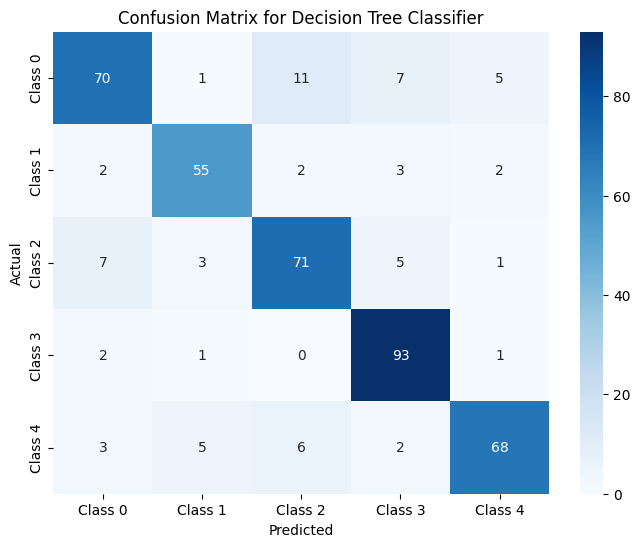

In [31]:
# Create a Decision Tree classifier
dt = DecisionTreeClassifier()

# Train the classifier
dt.fit(bow_train, y_train)

# Make predictions on the test set
y_pred_tree = dt.predict(bow_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_tree)
f1 = f1_score(y_test, y_pred_tree, average='weighted')
print(f"Accuracy: {accuracy:.2f}")
print(f"f1 score : {f1:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_tree))

# Calculate the confusion matrix
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0','Class 1','Class 2','Class 3','Class 4'],
            yticklabels=['Class 0','Class 1','Class 2','Class 3','Class 4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

## Random Forest

Accuracy: 0.97
f1 score : 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        94
           1       0.98      0.95      0.97        64
           2       0.96      0.93      0.95        87
           3       0.99      0.99      0.99        97
           4       1.00      0.96      0.98        84

    accuracy                           0.97       426
   macro avg       0.97      0.97      0.97       426
weighted avg       0.97      0.97      0.97       426



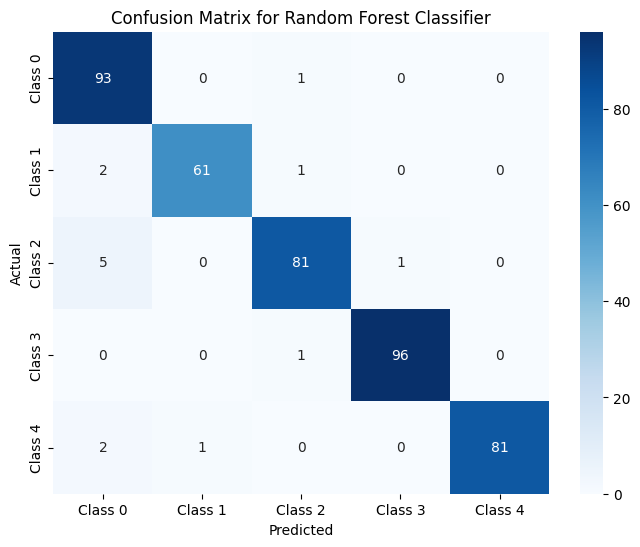

In [32]:
# Create a Random Forest classifier
rf = RandomForestClassifier()

# Train the classifier
rf.fit(bow_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(bow_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf, average='weighted')
print(f"Accuracy: {accuracy:.2f}")
print(f"f1 score : {f1:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Calculate the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0','Class 1','Class 2','Class 3','Class 4'],
            yticklabels=['Class 0','Class 1','Class 2','Class 3','Class 4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [33]:
#parameter tuning for Random Forest Classifier
'''
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced']
}

gs = GridSearchCV(rf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
gs.fit(bow_train, y_train)

print("Best Parameters:", gs.best_params_)
print("Best Score:", gs.best_score_)

'''

'\nfrom sklearn.model_selection import GridSearchCV\n\nparam_grid = {\n    \'n_estimators\': [50, 100, 200],\n    \'max_depth\': [None, 10, 20],\n    \'min_samples_split\': [2, 5, 10],\n    \'class_weight\': [\'balanced\']\n}\n\ngs = GridSearchCV(rf, param_grid, cv=3, scoring=\'accuracy\', n_jobs=-1)\ngs.fit(bow_train, y_train)\n\nprint("Best Parameters:", gs.best_params_)\nprint("Best Score:", gs.best_score_)\n\n'

## K- Nearest Neighbours

Accuracy: 0.62
f1 score : 0.63
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.55      0.68        94
           1       0.84      0.48      0.61        64
           2       0.95      0.68      0.79        87
           3       0.40      1.00      0.57        97
           4       1.00      0.32      0.49        84

    accuracy                           0.62       426
   macro avg       0.82      0.61      0.63       426
weighted avg       0.81      0.62      0.63       426



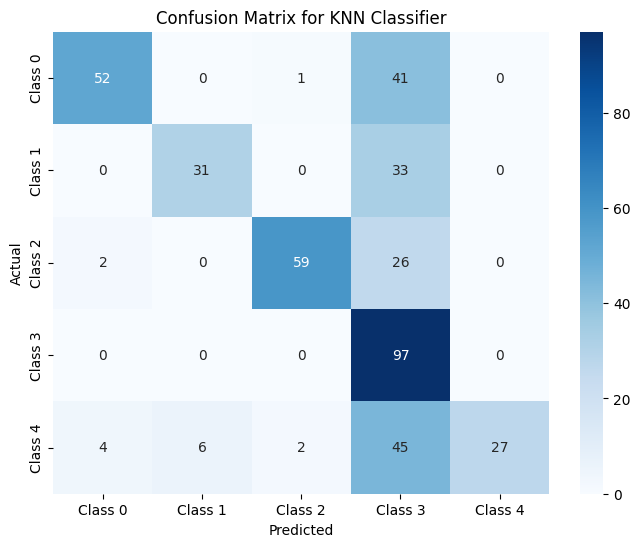

In [34]:
# Create KNeighborsClassifier instance
knn = KNeighborsClassifier(n_neighbors=5)

# Fit to the training data
knn.fit(bow_train, y_train)

# Predict on new data
y_pred_knn = knn.predict(bow_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn, average='weighted')
print(f"Accuracy: {accuracy:.2f}")
print(f"f1 score : {f1:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Calculate the confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0','Class 1','Class 2','Class 3','Class 4'],
            yticklabels=['Class 0','Class 1','Class 2','Class 3','Class 4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

In [35]:
#TF-IDF vectorization
tf_idf = TfidfVectorizer()
tfidf_a = tf_idf.fit_transform(art_train).todense()
tfidf_b = tf_idf.transform(art_test).todense()
tf_train = pd.DataFrame(tfidf_a, columns=tf_idf.get_feature_names_out())
tf_test = pd.DataFrame(tfidf_b, columns=tf_idf.get_feature_names_out())

tf_train.head()

,aa,aaa,aac,aadc,aaliyah,aaltra,aamir,aan,aara,aarhus,...,zoom,zooropa,zornotza,zorro,zubair,zuluaga,zurich,zutons,zvonareva,zvyagintsev
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Accuracy: 0.94


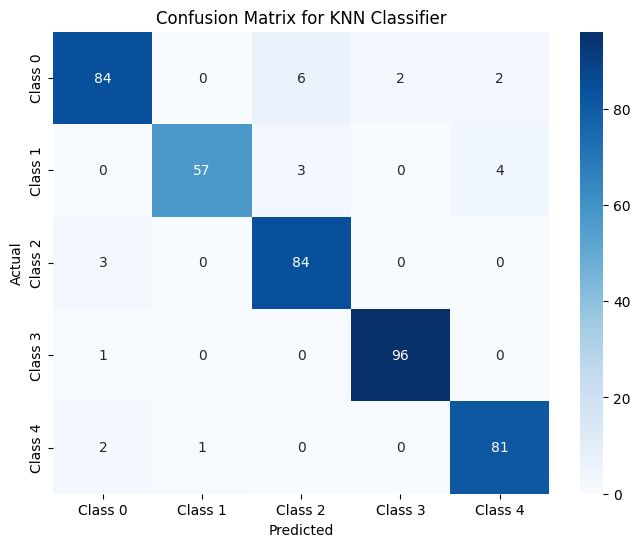

In [36]:
# Create KNeighborsClassifier instance
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Fit to the training data
knn_classifier.fit(tf_train, y_train)

# Predict on new data
y_pred_knn = knn_classifier.predict(tf_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy:.2f}")

# Calculate the confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0','Class 1','Class 2','Class 3','Class 4'],
            yticklabels=['Class 0','Class 1','Class 2','Class 3','Class 4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

Using a TF-IDF vectorization technique instead of Bag or Words, we got a tremendous hike in the Accuracy score. This is because it takes into consideration the uniqueness of the words with respect to the articles.

In [37]:
y_train.head()

,Category
1315,0
518,0
1187,3
1387,1
924,0


In [38]:
y_test.head()

,Category
305,3
2097,1
1804,4
1055,4
2116,4


In [39]:
X_train.head()

,Article
1315,"[tokyo, say, deflation, controlled, japanese, ..."
518,"[yukos, drop, bank, court, bid, russian, oil, ..."
1187,"[newcastle, join, morientes, race, newcastle, ..."
1387,"[parker, saxophone, head, auction, saxophone, ..."
924,"[india, open, sky, competition, india, allow, ..."


In [40]:
X_train.reset_index(drop=True)

,Article
0,"[tokyo, say, deflation, controlled, japanese, ..."
1,"[yukos, drop, bank, court, bid, russian, oil, ..."
2,"[newcastle, join, morientes, race, newcastle, ..."
3,"[parker, saxophone, head, auction, saxophone, ..."
4,"[india, open, sky, competition, india, allow, ..."
...,...
1695,"[border, ulster, ulster, clung, morale, boosti..."
1696,"[euronext, poised, make, lse, bid, pan, europe..."
1697,"[blair, look, election, campaign, tony, blair,..."
1698,"[singer, christina, aguilera, wed, pop, star, ..."


In [41]:
#tokenization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_sentence_len = 1000

def tokenize_and_pad(inp_text, max_len, tok):

    text_seq = tok.texts_to_sequences(inp_text)
    #padding
    text_seq = pad_sequences(text_seq, maxlen=max_len, padding='post')

    return text_seq

text_tok = Tokenizer()

#fitting the tokenizer on the training data
text_tok.fit_on_texts(X_train.to_list())
train_text_X = tokenize_and_pad(inp_text=X_train.to_list(), max_len=max_sentence_len, tok=text_tok)
test_text_X = tokenize_and_pad(inp_text=X_test.to_list(), max_len=max_sentence_len, tok=text_tok)

#adding 1 to account for the padding token
vocab_size = len(text_tok.word_index)+1

print("Overall text vocab size", vocab_size)

Overall text vocab size 22673


This function :
- Ensures all sequences are the same length (max_len)

- Converts text to numerical format, which models can understand

- Makes preprocessing reusable and clean

In [42]:
train_text_X

array([[ 3237,    17,  7162, ...,     0,     0,     0],
       [  442,   969,   105, ...,     0,     0,     0],
       [  906,  1050,  3491, ...,     0,     0,     0],
       ...,
       [   84,   153,    53, ...,     0,     0,     0],
       [  598, 10860,  5916, ...,     0,     0,     0],
       [  881,   374,   442, ...,     0,     0,     0]], dtype=int32)

In [43]:
test_text_X

array([[1832, 2166, 1670, ...,    0,    0,    0],
       [ 943,  362, 5747, ...,    0,    0,    0],
       [2175, 3190, 1953, ...,    0,    0,    0],
       ...,
       [5187, 1797, 2364, ...,    0,    0,    0],
       [1845,   43, 1062, ...,    0,    0,    0],
       [  92,   55, 5783, ...,    0,    0,    0]], dtype=int32)

In [44]:
#train text length
len(train_text_X)

1700

In [45]:
#array lenght
len(train_text_X[0])

1000

In [46]:
#encoding y train and y test
y_train = pd.get_dummies(y_train).values.argmax(axis=1)
y_test = pd.get_dummies(y_test).values.argmax(axis=1)

In [47]:
y_train

array([0, 0, 3, ..., 2, 1, 0])

In [48]:
y_test

array([3, 1, 4, 4, 4, 2, 0, 4, 3, 0, 3, 2, 3, 1, 2, 2, 3, 0, 3, 2, 0, 4,
       0, 3, 3, 3, 4, 3, 3, 4, 3, 4, 3, 2, 4, 2, 4, 3, 0, 0, 3, 3, 2, 3,
       3, 4, 0, 4, 4, 3, 2, 4, 3, 4, 0, 4, 1, 0, 1, 2, 1, 2, 0, 3, 4, 3,
       0, 0, 4, 3, 4, 1, 0, 1, 3, 3, 1, 0, 3, 1, 0, 3, 1, 3, 4, 0, 4, 2,
       0, 0, 2, 2, 3, 0, 2, 2, 4, 1, 2, 3, 4, 3, 4, 1, 4, 2, 2, 1, 3, 1,
       4, 3, 0, 2, 4, 4, 1, 3, 0, 3, 1, 0, 4, 3, 3, 3, 1, 0, 3, 0, 0, 4,
       3, 3, 1, 4, 2, 3, 4, 3, 0, 0, 4, 0, 3, 4, 4, 2, 3, 2, 1, 0, 2, 1,
       0, 1, 4, 2, 3, 4, 0, 4, 0, 3, 0, 3, 0, 1, 0, 2, 1, 2, 2, 2, 0, 1,
       0, 0, 3, 2, 4, 2, 3, 0, 0, 3, 3, 1, 0, 2, 4, 2, 4, 3, 2, 0, 4, 1,
       3, 3, 2, 2, 4, 2, 2, 2, 2, 0, 3, 0, 4, 3, 4, 3, 1, 2, 4, 3, 4, 0,
       0, 2, 0, 0, 3, 3, 2, 3, 0, 3, 2, 4, 0, 3, 2, 1, 3, 2, 0, 3, 0, 0,
       2, 1, 2, 2, 3, 3, 2, 0, 0, 4, 3, 2, 3, 1, 0, 0, 2, 0, 4, 4, 3, 4,
       4, 1, 3, 0, 2, 0, 3, 0, 2, 1, 3, 3, 4, 2, 4, 3, 0, 2, 4, 2, 4, 1,
       0, 3, 0, 3, 1, 1, 2, 2, 4, 2, 4, 0, 1, 3, 3,

In [49]:
#Latent dimension: Dimension of the weight matrix U, V, W
latent_dim=512
#Embedding dimension: Dimension of the word embeddings at the embedding layer
embedding_dim=256

## RNN Pipeline

In [50]:
total_classes = df["Category"].nunique()

# Set seeds for reproducibility
seed = 56
tf.random.set_seed(seed)
np.random.seed(seed)

# Create the model
model = Sequential(name="RNNModel")
model.add(Embedding(vocab_size, embedding_dim, input_shape=(len(train_text_X[0]),), trainable=True))
model.add(SimpleRNN(latent_dim, return_sequences=False, activation='tanh'))
model.add(Dense(128, activation='softmax'))
model.add(Dense(64, activation='softmax'))
model.add(Dense(total_classes, activation='softmax'))

# Model summary to see the architecture
model.summary()

Model: "RNNModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 1000, 256)      │     5,804,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 512)            │       393,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,272,261 (23.93 MB)

 Trainable params: 6,272,261 (23.93 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
#compiling and fitting
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_accuracy',
                               mode='max',
                               verbose=1,
                               patience=5)

model.fit(x=train_text_X, y=y_train,
          validation_data=(test_text_X, y_test),
          batch_size=32,
          epochs=100,
          callbacks=[early_stopping]
        )

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 144s 3s/step - accuracy: 0.2436 - loss: 1.6063 - val_accuracy: 0.2277 - val_loss: 1.6051
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.2436 - loss: 1.6003 - val_accuracy: 0.2277 - val_loss: 1.6047
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 145s 3s/step - accuracy: 0.2385 - loss: 1.5972 - val_accuracy: 0.2277 - val_loss: 1.6050
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 198s 3s/step - accuracy: 0.2359 - loss: 1.5954 - val_accuracy: 0.2207 - val_loss: 1.6055
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 142s 3s/step - accuracy: 0.2444 - loss: 1.5944 - val_accuracy: 0.2207 - val_loss: 1.6061
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.2444 - loss: 1.5937 - val_accuracy: 0.2207 - val_loss: 1.6066
Epoch 6: early stopping


## LSTM Pipeline

In [52]:
model = Sequential(name = "LSTMModel")
model.add(Embedding(vocab_size, embedding_dim, input_shape=(len(train_text_X[0]),), trainable=True))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))  # LSTM layer
model.add(Dense(64, activation='relu'))  # Dense layer
model.add(Dropout(0.5))
model.add(Dense(total_classes, activation='softmax'))


# Model summary to see the architecture
model.summary()

Model: "LSTMModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 1000, 256)      │     5,804,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ (None, 1000, 256)      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 100)            │       142,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,953,877 (22.71 MB)

 Trainable params: 5,953,877 (22.71 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
#compiling and fitting
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(x=train_text_X, y=y_train,
          validation_data=(test_text_X, y_test),
          batch_size=32,
          epochs=100,
          callbacks=[early_stopping])

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 145s 3s/step - accuracy: 0.2255 - loss: 1.6081 - val_accuracy: 0.2277 - val_loss: 1.6056
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.2209 - loss: 1.5995 - val_accuracy: 0.2277 - val_loss: 1.6060
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.2411 - loss: 1.5978 - val_accuracy: 0.2207 - val_loss: 1.6065
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 149s 3s/step - accuracy: 0.2310 - loss: 1.6012 - val_accuracy: 0.2277 - val_loss: 1.6057
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.2315 - loss: 1.5995 - val_accuracy: 0.2207 - val_loss: 1.6074
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.2555 - loss: 1.5988 - val_accuracy: 0.2277 - val_loss: 1.6081
Epoch 6: early stopping


In [54]:
from transformers import BertTokenizer, BertModel
import torch
from tensorflow.keras.utils import to_categorical

In [55]:
df2.head()

,Category,Article
0,Technology,tv future in the hands of viewers with home th...
1,Business,worldcom boss left books alone former worldc...
2,Sports,tigers wary of farrell gamble leicester say ...
3,Sports,yeading face newcastle in fa cup premiership s...
5,Politics,howard hits back at mongrel jibe michael howar...


In [56]:
df2.shape

(2126, 2)

This is our preprocessed dataset

In [57]:
#train test split
X = df2.drop(columns=["Category"])
y = df2["Category"]

In [59]:
X.shape

(2126, 1)

In [60]:
y.shape

(2126,)

In [61]:
len(X["Article"].tolist())

2126

In [62]:
from tqdm import tqdm  # For progress bar

# Check GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')
bert_model.to(device)
bert_model.eval()

# Your input list of text
articles = X["Article"].tolist()

# Batched inference
batch_size = 32
embeddings = []

for i in tqdm(range(0, len(articles), batch_size)):
    batch_sentences = articles[i:i + batch_size]

    # Tokenize the batch
    inputs = tokenizer(batch_sentences, return_tensors="pt",
                       padding=True, truncation=True, max_length=128)

    # Move inputs to GPU if available
    inputs = {key: val.to(device) for key, val in inputs.items()}

    with torch.no_grad():
        outputs = bert_model(**inputs)
        cls_embeddings = outputs.last_hidden_state[:, 0, :]  # CLS token

    # Move back to CPU and store
    embeddings.append(cls_embeddings.cpu().numpy())

# Stack all into a NumPy array
X = np.vstack(embeddings)
print("Embedding shape:", X.shape)


Using device: cpu


100%|██████████| 67/67 [08:24<00:00,  7.52s/it]

Embedding shape: (2126, 768)


In [63]:
len(X)

2126

In [64]:
len(X[1])

768

In [66]:
X

array([[-2.73399502e-01, -8.04050714e-02,  5.25636971e-01, ...,
        -4.92800564e-01,  4.88871247e-01,  2.57184654e-01],
       [-2.25060970e-01,  2.30627388e-01, -1.40162334e-02, ...,
         2.93730646e-01,  6.92670882e-01,  2.57361740e-01],
       [-2.23140329e-01, -1.82228237e-01,  1.98963359e-01, ...,
         2.38280848e-01,  6.07917607e-01,  5.83780646e-01],
       ...,
       [-1.61564589e-01, -7.40034729e-02,  1.72101625e-03, ...,
        -2.70028502e-01,  6.09693348e-01,  1.25879869e-01],
       [ 1.82538077e-01, -1.09626144e-01,  2.54919261e-01, ...,
        -4.11113760e-05,  5.69057465e-01,  5.78360677e-01],
       [-3.39205801e-01, -2.11497005e-02,  2.60235280e-01, ...,
        -2.35276923e-01,  4.67879802e-01,  8.41604233e-01]], dtype=float32)

In [68]:
y.head()

,Category
0,Technology
1,Business
2,Sports
3,Sports
5,Politics


We have to encode the y inorder to do prediction

In [69]:
#encoding y

labels = pd.get_dummies(df["Category"]).values.argmax(axis=1)
y = to_categorical(labels, num_classes=total_classes)

In [70]:
y

array([[0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [71]:
#train test splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [72]:
#reahaping for the LSTM model(samples, timesteps, features)
X_train_reshaped = X_train[:, np.newaxis, :]
X_test_reshaped = X_test[:, np.newaxis, :]

The Shape would be: (batch_size, 1, hidden_size)

In [73]:
X.shape

(2126, 768)

In [75]:
X_train_reshaped.shape

(1700, 1, 768)

In [78]:
# Set seeds for reproducibility
seed = 56
tf.random.set_seed(seed)
np.random.seed(seed)

model = Sequential(name="LSTMModelwithBert")
model.add(LSTM(128, return_sequences=False,input_shape=(1, 768)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(total_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [79]:
model.summary()

Model: "LSTMModelwithBert"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 128)            │       459,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 467,845 (1.78 MB)

 Trainable params: 467,845 (1.78 MB)

 Non-trainable params: 0 (0.00 B)

In [80]:
early_stopping = EarlyStopping(monitor='val_accuracy',
                               mode='max',
                               verbose=1,
                               patience=5)

model.fit(x=X_train_reshaped, y=y_train,
          validation_data=(X_test_reshaped, y_test),
          batch_size=32,
          epochs=100,
          callbacks=[early_stopping]
        )

Epoch 1/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.6640 - loss: 1.0056 - val_accuracy: 0.9460 - val_loss: 0.1570
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9633 - loss: 0.1270 - val_accuracy: 0.9554 - val_loss: 0.1325
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9782 - loss: 0.0781 - val_accuracy: 0.9577 - val_loss: 0.1404
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9799 - loss: 0.0636 - val_accuracy: 0.9531 - val_loss: 0.1266
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9873 - loss: 0.0444 - val_accuracy: 0.9648 - val_loss: 0.1215
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9892 - loss: 0.0323 - val_accuracy: 0.9648 - val_loss: 0.1259
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9938 - loss: 0.0217 - val_accuracy: 0.9695 - val_loss: 0.1118
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9932 - loss: 0.0197 - val_accuracy: 0.9765 - 

In [81]:
# Predict probabilities
y_pred = model.predict(X_test_reshaped)

# Convert probabilities to class predictions (for multi-class classification)
y_pred = np.argmax(y_pred, axis=1)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


In [83]:
y_test.argmax(axis=1)

array([4, 0, 3, 1, 4, 3, 2, 2, 4, 2, 1, 0, 2, 3, 0, 3, 0, 1, 4, 0, 3, 1,
       0, 1, 2, 4, 0, 2, 3, 0, 1, 2, 2, 4, 2, 1, 2, 3, 3, 3, 3, 1, 3, 0,
       1, 0, 0, 0, 4, 3, 2, 1, 1, 2, 3, 0, 3, 0, 4, 1, 3, 0, 1, 1, 1, 1,
       0, 4, 4, 0, 2, 3, 4, 4, 3, 3, 0, 4, 2, 0, 2, 4, 0, 1, 3, 3, 0, 0,
       3, 4, 3, 3, 0, 2, 3, 3, 2, 1, 3, 2, 3, 4, 1, 3, 1, 2, 2, 4, 4, 2,
       0, 3, 4, 4, 3, 1, 4, 0, 1, 2, 3, 3, 0, 2, 3, 2, 4, 0, 1, 0, 0, 4,
       4, 0, 2, 0, 1, 0, 0, 3, 3, 2, 1, 0, 4, 0, 3, 2, 3, 0, 3, 0, 0, 4,
       4, 0, 2, 1, 2, 3, 2, 0, 2, 0, 1, 0, 4, 3, 4, 4, 0, 2, 1, 2, 4, 4,
       0, 3, 2, 3, 3, 2, 0, 0, 4, 0, 4, 0, 0, 3, 1, 2, 2, 4, 1, 0, 0, 2,
       3, 0, 0, 3, 3, 2, 3, 3, 3, 2, 1, 0, 0, 1, 0, 0, 0, 0, 3, 4, 1, 4,
       1, 1, 2, 2, 2, 1, 4, 4, 2, 1, 1, 0, 3, 2, 2, 1, 4, 4, 3, 2, 1, 3,
       2, 0, 0, 1, 2, 2, 0, 0, 3, 1, 3, 3, 1, 3, 1, 1, 1, 0, 0, 3, 3, 4,
       1, 2, 0, 3, 3, 1, 3, 0, 1, 2, 0, 2, 2, 2, 3, 4, 2, 1, 1, 0, 4, 1,
       3, 3, 1, 2, 3, 1, 0, 4, 2, 1, 3, 3, 3, 0, 3,

In [84]:
y_pred

array([4, 0, 3, 1, 4, 3, 2, 2, 4, 2, 1, 0, 2, 3, 0, 3, 0, 1, 4, 0, 3, 1,
       0, 1, 2, 4, 0, 2, 3, 0, 1, 2, 2, 4, 2, 4, 4, 3, 3, 3, 3, 1, 3, 0,
       1, 0, 0, 0, 4, 3, 2, 1, 1, 2, 3, 0, 3, 0, 4, 1, 3, 0, 1, 1, 1, 1,
       0, 4, 4, 0, 2, 3, 4, 4, 3, 3, 0, 4, 2, 0, 2, 4, 0, 1, 3, 3, 0, 0,
       3, 4, 3, 3, 0, 2, 3, 3, 2, 1, 3, 2, 3, 4, 1, 3, 1, 2, 2, 4, 4, 2,
       0, 3, 4, 4, 3, 1, 4, 2, 1, 2, 3, 3, 0, 2, 3, 2, 4, 4, 1, 0, 0, 4,
       4, 0, 2, 0, 1, 0, 0, 3, 3, 2, 1, 0, 4, 0, 3, 2, 3, 0, 3, 0, 0, 4,
       4, 0, 2, 1, 2, 3, 2, 0, 2, 0, 1, 0, 4, 3, 4, 4, 0, 2, 1, 2, 4, 4,
       0, 3, 2, 3, 3, 2, 0, 0, 4, 0, 4, 0, 0, 3, 1, 2, 2, 4, 1, 0, 0, 2,
       3, 0, 0, 3, 3, 2, 3, 3, 3, 2, 1, 0, 0, 1, 0, 0, 0, 0, 3, 4, 1, 4,
       1, 1, 2, 1, 2, 1, 4, 4, 2, 1, 1, 0, 3, 2, 2, 1, 4, 4, 3, 2, 1, 3,
       2, 0, 3, 1, 2, 2, 0, 0, 3, 1, 3, 3, 1, 3, 1, 1, 1, 0, 0, 3, 3, 4,
       1, 2, 0, 3, 3, 1, 3, 0, 1, 2, 0, 2, 2, 2, 3, 4, 2, 1, 1, 0, 4, 1,
       3, 3, 1, 2, 3, 1, 0, 4, 2, 1, 3, 3, 3, 0, 3,

The prediction looks almost same

Accuracy: 0.9671361502347418
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       101
           1       0.96      0.96      0.96        74
           2       0.96      0.96      0.96        81
           3       0.99      1.00      1.00       101
           4       0.93      0.94      0.94        69

    accuracy                           0.97       426
   macro avg       0.96      0.96      0.96       426
weighted avg       0.97      0.97      0.97       426



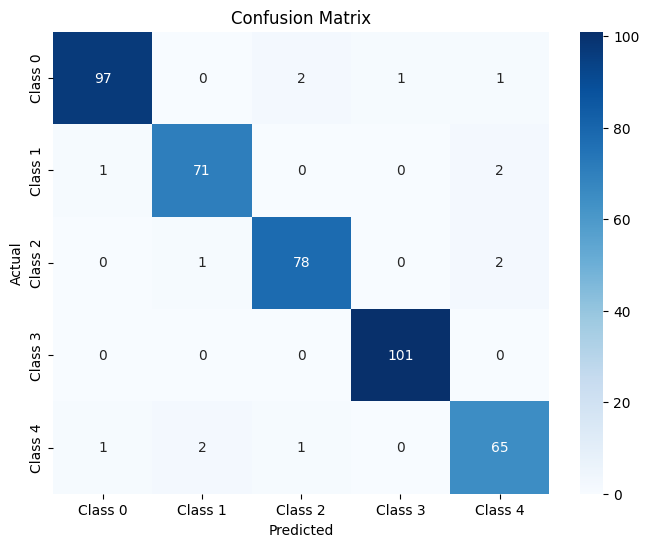

In [89]:
print("Accuracy:", accuracy_score(y_test.argmax(axis=1), y_pred))

# Detailed classification report
print("Classification Report:\n", classification_report(y_test.argmax(axis=1), y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0','Class 1','Class 2','Class 3','Class 4'],
            yticklabels=['Class 0','Class 1','Class 2','Class 3','Class 4'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Insights :**

The confusion matrix shows predictions vs actuals for each class:

- Diagonal dominance: Most values are concentrated along the diagonal — this means most predictions are correct.

- Low off-diagonal values: Very few misclassifications. For example:

  - Class 0 was confused 4 times (2 → class 2, 1 → class 3, 1 → class 4)

  - Class 3 was perfectly predicted: 101 correct, 0 misclassified

  - Class 4 had minor confusion with classes 0, 1, 2 (only 4 misclassifications total)

**1. How many news articles are present in the dataset that we have?**

Ans )
 We have a total of 5 news article categories:  
1. Entertainment  
2. Politics  
3. Sports  
4. Business  
5. Technology  

**2.  Most of the news articles are from _____ category.**  

Ans ) Sports and Business categories.  

**3.  Only ___ no. of articles belong to the ‘Technology’ category**  

Ans )Out of the entire dataset, 347 articles belong to the Technology category.  

**4. What are Stop Words and why should they be removed from the text data?**

Ans)
 - **Stop Words** are common words in a language (e.g., "is," "and," "the") that carry little semantic meaning. These words are often removed during text preprocessing to reduce noise in text analysis. Removing stop words helps focus on meaningful terms, improving the efficiency and accuracy of text-based tasks like Natural Language Processing (NLP).  

**5. Explain the difference between Stemming and lematization.**  
Ans)
- **Stemming** reduces words to their root form by chopping off prefixes or suffixes, often ignoring grammatical correctness (e.g., "running" → "run").  
- **Lemmatization**, on the other hand, converts words to their base or dictionary form, ensuring grammatical accuracy (e.g., "running" → "run" or "better" → "good").  

Lemmatization is more precise but computationally expensive compared to stemming.  

**6. Which of the techniques Bag of Words or TF-IDF is considered to be more efficient than the other?**

Ans )

**TF-IDF** (Term Frequency-Inverse Document Frequency) is considered more efficient than **Bag of Words** because it assigns weights to words based on their importance, reducing the influence of common words while emphasizing rare, meaningful terms. In contrast, the Bag of Words model treats all terms equally, leading to higher dimensionality and less semantic insight.  

**7.  What's the shape of train & test data sets after performing a 75:25 split?**  
Ans ) We splitted the data in 80:20 ratio and the train and test shape is 1700 and 426

**8. Which of the following is found to be the best-performing model..
 a. Random Forest b. Nearest Neighbors c. Naive Bayes**

 Ans ) Naive Bayes with an accuracy of 98%

⭕Thank You!

In [ ]:
!jupyter --execute --to html